<a href="https://colab.research.google.com/github/jonnythebard/tf2_workbook/blob/master/rnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten, GRU, LSTM, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.0.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [3]:
# build rnn
i = Input(shape=(28, 28))
x = LSTM(128)(i)
x = Dense(10, activation="softmax")(x)
model = Model(i, x)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               80384     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [4]:
# train the model
r = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 421us/sample - loss: 0.3441 - accuracy: 0.8882 - val_loss: 0.1199 - val_accuracy: 0.9641
Epoch 2/10
60000/60000 [==============================] - 22s 367us/sample - loss: 0.1039 - accuracy: 0.9689 - val_loss: 0.0780 - val_accuracy: 0.9764
Epoch 3/10
60000/60000 [==============================] - 22s 368us/sample - loss: 0.0727 - accuracy: 0.9779 - val_loss: 0.0620 - val_accuracy: 0.9809
Epoch 4/10
60000/60000 [==============================] - 22s 367us/sample - loss: 0.0555 - accuracy: 0.9830 - val_loss: 0.0632 - val_accuracy: 0.9815
Epoch 5/10
60000/60000 [==============================] - 22s 368us/sample - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.0554 - val_accuracy: 0.9832
Epoch 6/10
60000/60000 [==============================] - 22s 366us/sample - loss: 0.0374 - accuracy: 0.9885 - val_loss: 0.0504 - val_accuracy: 0.9847
Epoch 7/10
60000/60000 [====================

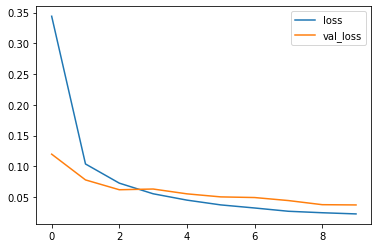

In [5]:
# Plot the loss
# lstm works nice
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Confusion matrix, without normalization
[[ 973    0    2    0    0    0    4    1    0    0]
 [   0 1128    1    1    0    1    1    2    1    0]
 [   1    0 1023    0    0    0    0    6    2    0]
 [   0    0    4  997    0    5    0    2    1    1]
 [   0    0    0    0  960    0    4    3    1   14]
 [   0    1    0    6    0  881    2    1    1    0]
 [   4    3    0    0    0    1  950    0    0    0]
 [   0    3    3    1    0    1    0 1018    0    2]
 [   5    0    2    4    0    3    2    0  957    1]
 [   0    0    0    0    3    3    1    3    3  996]]


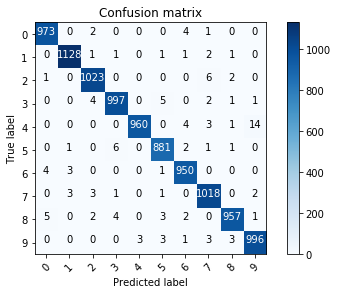

In [6]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 4 Predicted: 9')

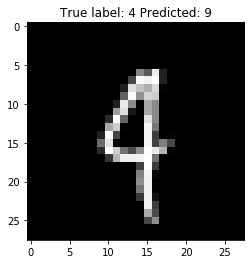

In [7]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))